In [5]:
import re
import sys
from time import sleep
from pprint import pprint
from functools import partial

import numpy as np
import optuna
try:
    import pandas as pd
except:
    pass


FILENAME = "print_stats_lambda100.cpp"

In [2]:
#!cp ../main.cpp ./print_stats_lambda100.cpp

In [6]:
ls

00000optimized.cpp  lambda100.ipynb  print_stats.cpp            solve.out*
in/                 main.cpp         print_stats.out*           stats/
lambda10.ipynb      main.cpp.out*    print_stats_lambda100.cpp


In [25]:
!mkdir in

In [2]:
for i in range(200):
    out_file = f"./in/{i:03d}.txt"
    !./{FILENAME}.out {i} > {out_file}

In [8]:
!g++ print_stats_lambda100.cpp -std=gnu++17 -Wall -Wextra -O2 -o print_stats_lambda100.out

print_stats_lambda100.cpp:451: warning: ignoring #pragma warning  [-Wunknown-pragmas]
  451 | #pragma warning( disable : 4146 )
      | 
print_stats_lambda100.cpp: In member function ‘void UltimateEstimator::Step()’:
print_stats_lambda100.cpp:1068:39: warning: comparison of integer expressions of different signedness: ‘signed char’ and ‘std::array<double, 60>::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
 1068 |   for (auto col = (signed char)0; col < data_x.size(); col++) {
      |                                   ~~~~^~~~~~~~~~~~~~~
print_stats_lambda100.cpp:1026:8: warning: unused variable ‘estimated_distance’ [-Wunused-variable]
 1026 |   auto estimated_distance = 0.0;
      |        ^~~~~~~~~~~~~~~~~~
print_stats_lambda100.cpp: In member function ‘void Explorer::Step()’:
print_stats_lambda100.cpp:1234:30: warning: narrowing conversion of ‘(((int)v.Explorer::Node::y) + 1)’ from ‘int’ to ‘signed char’ [-Wnarrowing]
 1234 |     const auto u = Node{ v.y + (i8)1, v.x, false }

In [9]:
!./print_stats_lambda100.out < ./in/000.txt > /dev/null

124.496 294.188
152.626 471.373
165.577 518.571
191.561 552.584
206.032 588.385
209.149 606.921
249.247 971.512
361.065 1027.06
361.242 989.722
390.106 2592.64
472.136 3116.5
477.75 2778.09
484.001 2856.09
531.92 2934.86
535.128 2849.93
537.626 2944.44
556.26 2999.97
556.922 2868.09
578.347 2938
629.491 3366.18
629.224 3630.2
658.161 3907.28
691.843 4281.01
700.151 4020.25
730.966 5677.22
744.686 5239.99
786.531 5354.02
794.885 6016.79
795.834 5568.41
797.479 5757.74
800.194 6846.27
808.521 6448.96
808.546 6105.66
809.139 5906.87
810.896 5710.79
828.412 6859.9
844.373 6639.37
849.773 6800.34
856.315 6991.47
857.748 6917.1
859.125 9119.78
860.285 8478.3
861.507 8167.52
864.634 8396.22
865.301 8677.59
873.626 8707.77
883.131 9064.14
885.277 9005.48
886.075 9094.93
885.895 9201.43
887.137 9130.08
889.768 10734.5
900.578 9882.56
895.866 10404.7
904.472 10179.2
916.777 9873.55
916.5 9513.38
916.121 9588.25
916.068 9554.67
927.08 10158.4
927.521 9970.85
928.051 9929.4
926.272 9717.56
925.611

1211.9 16913.7
1211.95 16878.9
1211.84 16888.1
1211.89 16860.2
1212.53 16845.1
1212.61 16829.1
1212.57 16848.3
1213.08 16970.5
1214.19 17006.7
1214.62 17007.1
1214.28 17037.2
1215.15 17085.8
1215.11 17105.7
1215.25 17072.9
1214.8 17060.9
1215.28 17046
1215.67 17058.6
1215.98 17090
1215.94 17113.1
1216.01 17099.3
1215.93 17087.3
1215.3 17079.9
1215.96 17087.5
1216.05 17067.2
1216.08 17065.8
1216.04 17058.5
1215.99 17063.8
1215.98 17060.6
1215.86 17064.4
1215.72 17067.2
1215.67 17064.1
1215.69 17061.8
1215.67 17077.7
1215.68 17087
1216.03 17117.1
1216.13 17129.8
1216.15 17137.8
1217.84 17096.9
1218.06 17040.9
1218.14 17038.4
1218.38 17032.6
1218.44 17036.8
1218.14 17050.5
1218.18 17054.9
1218.01 17069
1218.13 17063.7
1218.1 17070.1
1218.08 17072
1218.08 17079.1
1217.4 17179.2
1217.84 17128.9
1217.9 17126.6
1217.84 17157.5
1217.77 17184
1217.76 17205.9
1217.87 17214.8
1217.72 17239.4
1217.74 17254.8
1218.08 17241.5
1217.16 17264
1216.93 17262.7
1216.97 17254.7
1216.55 17311.6
1217.27 1736

In [18]:
stats_directory = "stats_lambda100"
!mkdir {stats_directory}

In [19]:
exe_file = "print_stats_lambda100.out"

scores = []
for i in range(100):
    i = f"{i:03d}"
    !./{exe_file} < in/{i}.txt > /dev/null 2> ./{stats_directory}/{i}.txt
    
#     score = !cargo run --release --manifest-path ../tools/Cargo.toml --bin tester in/{i}.txt $(pwd)/{exe_file}.out 2>&1 | grep Score
#     print(i, *score)
#     score = int(score[0].split()[-1])
#     scores.append(score)
#np.mean(scores) / 8e8, np.std(scores) / 1e6

In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



In [21]:
data = []
for i in range(100):
    i = f"{i:03d}"
    with open(f"./{stats_directory}/{i}.txt") as f:
        dat = f.read().strip().split("\n")
    dat = [list(map(float, d.split())) for d in dat]
    data.append(dat)
data = np.array(data)

In [22]:
y = []
for i in range(100):
    i = f"{i:03d}"
    DM = !tail ./in/{i}.txt -n 1
    D, M = map(int, DM[0].split())
    y.append(M)
y = np.array(y)

In [23]:
data.shape

(100, 999, 2)

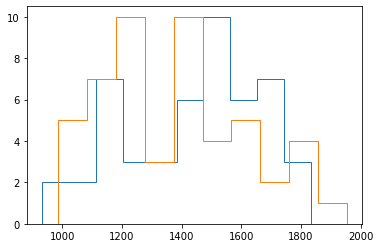

In [24]:
# ridge
plt.hist(data[:, 998, 0][y==1], bins=10, histtype="step")
plt.hist(data[:, 998, 0][y==2], bins=10, histtype="step")
plt.show()

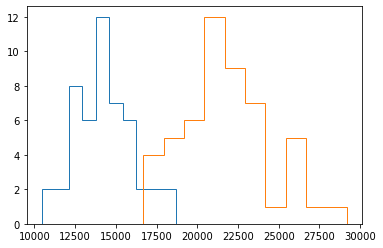

In [25]:
# lasso
plt.hist(data[:, 998, 1][y==1], bins=10, histtype="step")
plt.hist(data[:, 998, 1][y==2], bins=10, histtype="step")
plt.show()

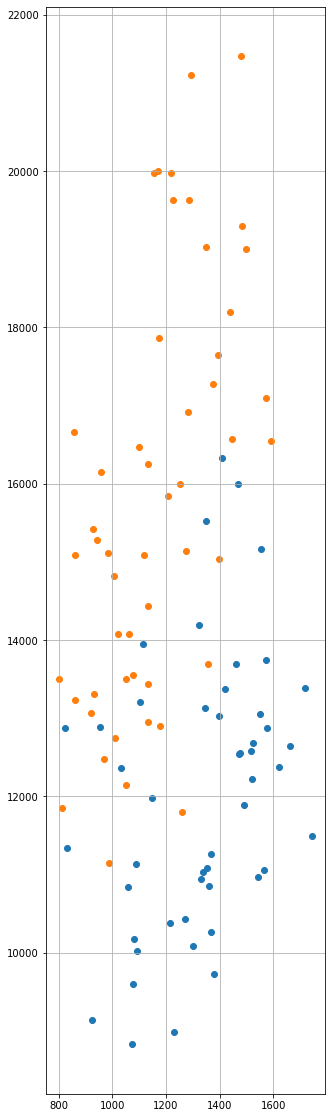

In [26]:
turn = 200
plt.figure(figsize=(5, 20))
plt.scatter(data[:, turn, 0][y==1], data[:, turn, 1][y==1])
plt.scatter(data[:, turn, 0][y==2], data[:, turn, 1][y==2])
plt.grid()

<ipython-input-27-7c80e60ef1c0>:12: RuntimeWarning: divide by zero encountered in log
  y_ = np.log((x_-100) * 1e-2 +1) * 5000


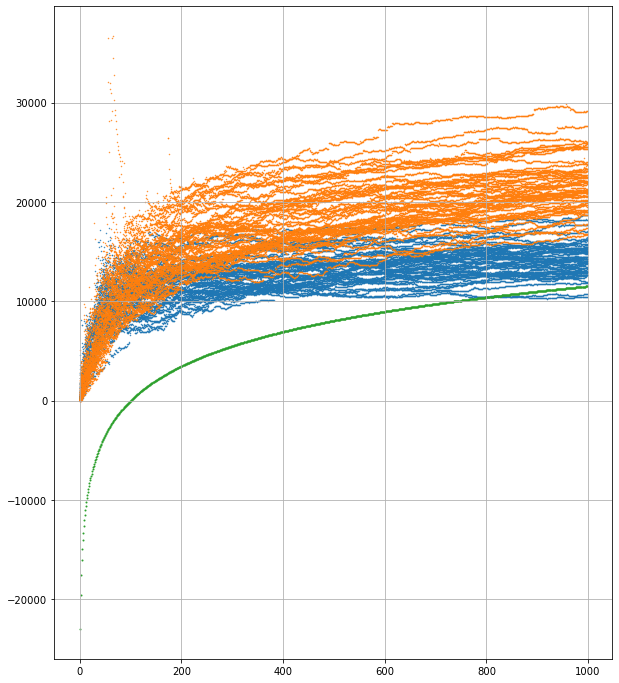

In [27]:
lasso = data[:, :, 1]
plt.figure(figsize=(10, 12))
lasso_m1 = lasso[y==1]
lasso_m2 = lasso[y==2]
y_ = lasso_m1.reshape(-1)
x_ = np.tile(np.arange(999), len(lasso_m1))
plt.scatter(x_, y_, s=0.2)
y_ = lasso_m2.reshape(-1)
x_ = np.tile(np.arange(999), len(lasso_m2))
plt.scatter(x_, y_, s=0.2)
x_ = np.arange(999)
y_ = np.log((x_-100) * 1e-2 +1) * 5000
plt.scatter(x_, y_, s=1)
plt.grid()